In [407]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading and inspecting the data
df1 = pd.read_csv("species_info.csv")

df1.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [ ]:
#The first dataset contains informations about different species, their scientific and common names as well as their
#conservation status.

In [425]:
df2 = pd.read_csv("observations.csv") 
df2

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [ ]:
#The second dataset represents observations of the species in different National Parks.

In [ ]:
#From the first inspection i note that there are some missing values in the first dataset (df1) so i want to investigate that by
#performing some analysis.

In [410]:
df1.count()

#based on this output, i find out that a urge amount of data is missing in the "conservation status" column

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [411]:
#listing the unique values in this column

df1.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [412]:
#In fact i see a value (nan) appearing, which represent missing values.
#Calculating the percentage of missing values for the "conservation status" column

percent_miss = round(df1.conservation_status.isnull().sum()/df1.category.count() * 100, 2)
print("{} Percent of data is missing from the conservation \
status column".format(percent_miss))

96.72 Percent of data is missing from the conservation status column


In [413]:
#I can assume from this results that the missing values concern species that enter in none of the status of interest,
#corresponding to species that are not protected
#so i can delete all of the rows with missing conservation status value

df1.dropna(subset="conservation_status", inplace=True)
df1.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


In [ ]:
#Now i have a reduced dataset with informations on particular Species of interest for our analysis.

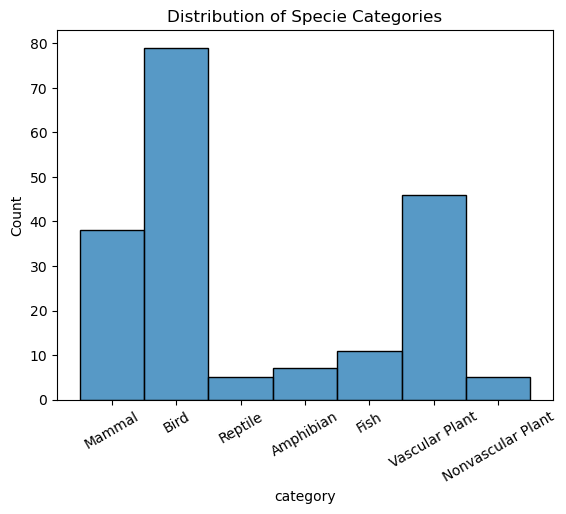

In [446]:
#i'm interested in finding out the proportion of each category of species, so i perform a countplot of the "category" column.

plt.figure()
sns.histplot(x=df1.category, data=df1)
plt.xticks(rotation=30)
plt.title("Distribution of Specie Categories")
plt.savefig(r"C:\Users\HP EliteBook\Desktop\BIDataAnalysis\Projects\plots\biodiv1.png", dpi=300)
plt.show()


In [ ]:
#I find out that Bird, Mammal and Vascular Plant categories have respectively the highest count of Species.

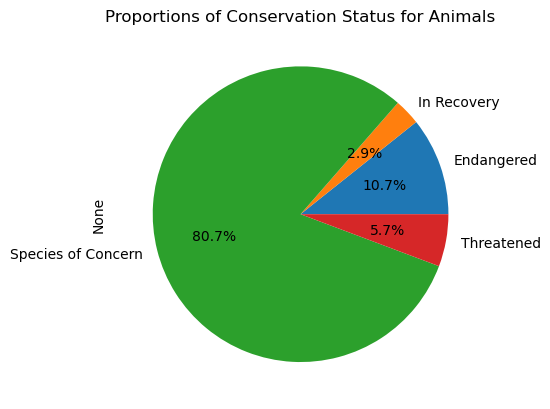

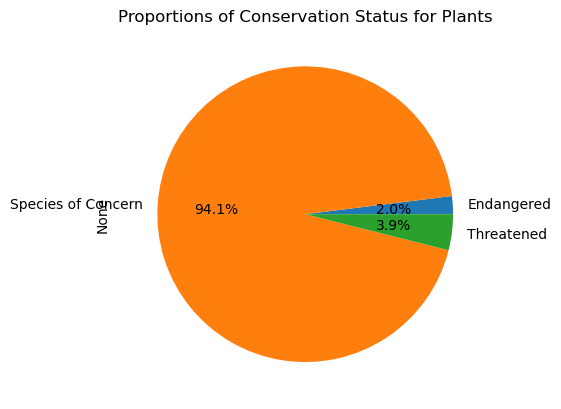

In [448]:
#I'm interested in finding out about the proportions of each conservation status for two groups of Species, Animals and Plants. 
#So i create a subset from the dataset(df1) and display a pie chart for each group.

animal_df = df1[df1["category"].isin(["Mammal", "Bird", "Reptile", "Amphibian", "Fish"])]
plant_df = df1[df1.category.isin(["Vascular Plant", "Nonvascular Plant"])]

plt.figure()
animal_df.groupby("conservation_status").size().plot(kind="pie", autopct="%.1f%%")
plt.title("Proportions of Conservation Status for Animals")
plt.savefig(r"C:\Users\HP EliteBook\Desktop\BIDataAnalysis\Projects\plots\biodiv2", dpi=300)
plt.show()

plt.figure()
plant_df.groupby("conservation_status").size().plot(kind="pie", autopct="%.1f%%")
plt.title("Proportions of Conservation Status for Plants")
plt.savefig(r"C:\Users\HP EliteBook\Desktop\BIDataAnalysis\Projects\plots\biodiv3", dpi=300)
plt.show()

In [ ]:
#From this analysis you can see that almost 81 percent of the Animals of interest are Species of concern compared to 94 percent
#for the Plants.
#You can also see that 10.7 percent of the Animals are endangered species while 5.7 percent are threatened and 2.9 pencent are 
#in recovery.
#In comparison, 2 percent of the Plants are endangered and 3.9 percent threatened. There's no proportion of Plants in recovery.

<Figure size 640x480 with 0 Axes>

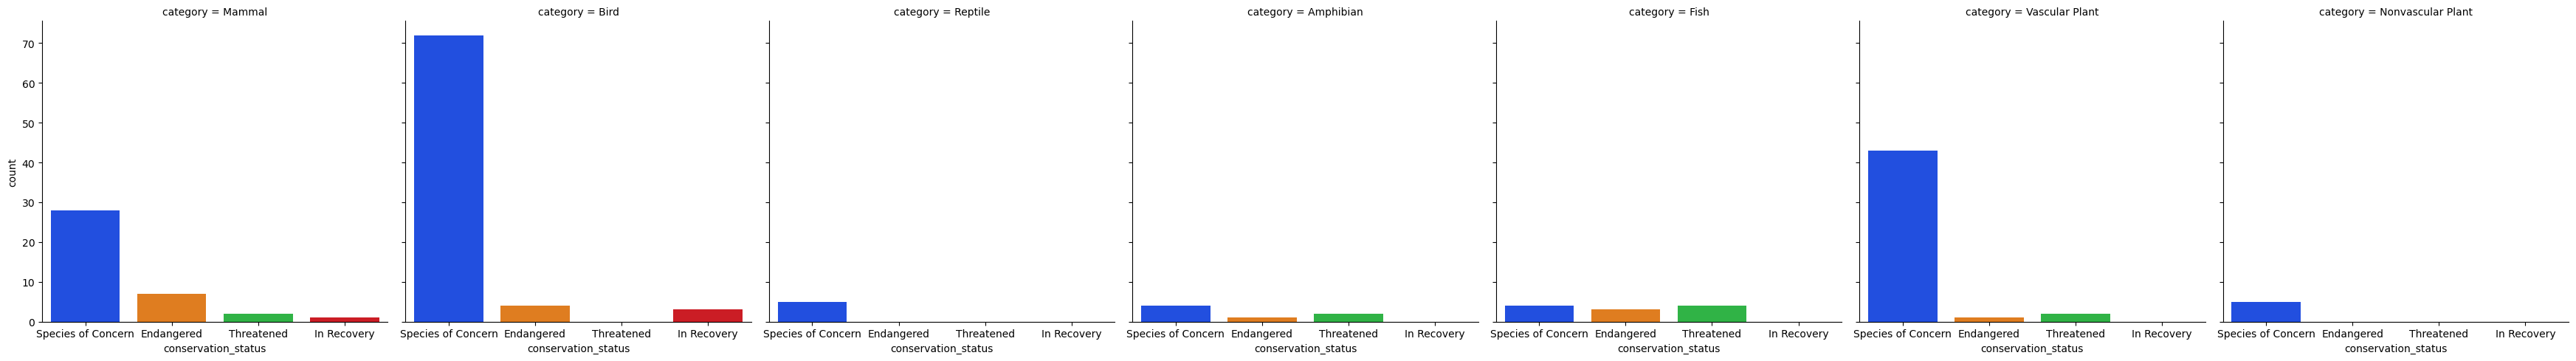

In [449]:
#I want go deaper in my investigations and find about the count of each conservation status for each species category and 
#vice-versa.
#So i perform a countplot series for each category of species with the count of each conservation status.

plt.figure()
sns.catplot(x="conservation_status", col="category", 
                data=df1, kind="count", palette="bright")
plt.savefig(r"C:\Users\HP EliteBook\Desktop\BIDataAnalysis\Projects\plots\biodiv4.png", dpi=300)
plt.show()

In [ ]:
#You can note that overall the categories actually contain mostly species of concern, with for example around 70 Birds, 
#42 Vascular Plants and 28 mammals. There are also some notable numbers of endangered mammals, birds and fishes (around 7, 4
#and 3 respectively).
#Threatened species are mostly fishes(about 5).

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

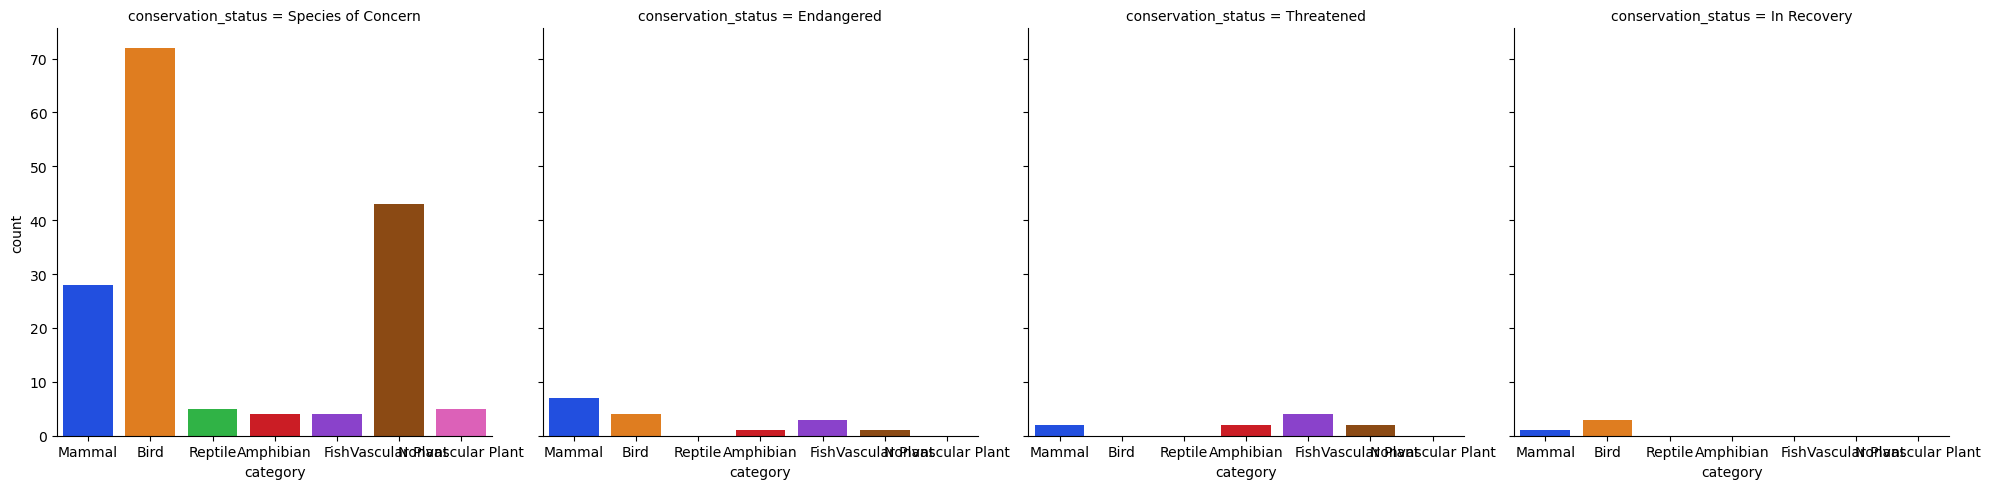

In [444]:
#I also display a countplot series for each conservation status with the counts of each category.

plt.figure()
sns.catplot(x="category", col="conservation_status", 
                data=df1, kind="count", palette="bright")
plt.savefig(r"C:\Users\HP EliteBook\Desktop\BIDataAnalysis\Projects\plots\count2.png", dpi=300)
plt.show()


In [ ]:
#Now i can confirm that most of the species of interest are in the conservation status "Species of Concern".

In [ ]:
#I want to push my analysis a bit further and try to find out wish species are observed the most in each park.
#So i start by checking the second dataset(df2), the one containing informations about observations and park names, for any 
#missing or duplicated values.

In [316]:
df2.duplicated().value_counts()

False    23281
True        15
dtype: int64

In [325]:
df2.isnull().value_counts()

scientific_name  park_name  observations
False            False      False           23296
dtype: int64

In [319]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [371]:

df2.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [395]:
#Then i merge the two datasets in a bigger one (df3), containing all the informations i need.

df3=pd.merge(df1, df2, on="scientific_name")
df3.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Canis latrans,Coyote,Species of Concern,Bryce National Park,85
1,Mammal,Canis latrans,Coyote,Species of Concern,Yellowstone National Park,206
2,Mammal,Canis latrans,Coyote,Species of Concern,Great Smoky Mountains National Park,68
3,Mammal,Canis latrans,Coyote,Species of Concern,Yosemite National Park,99
4,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35


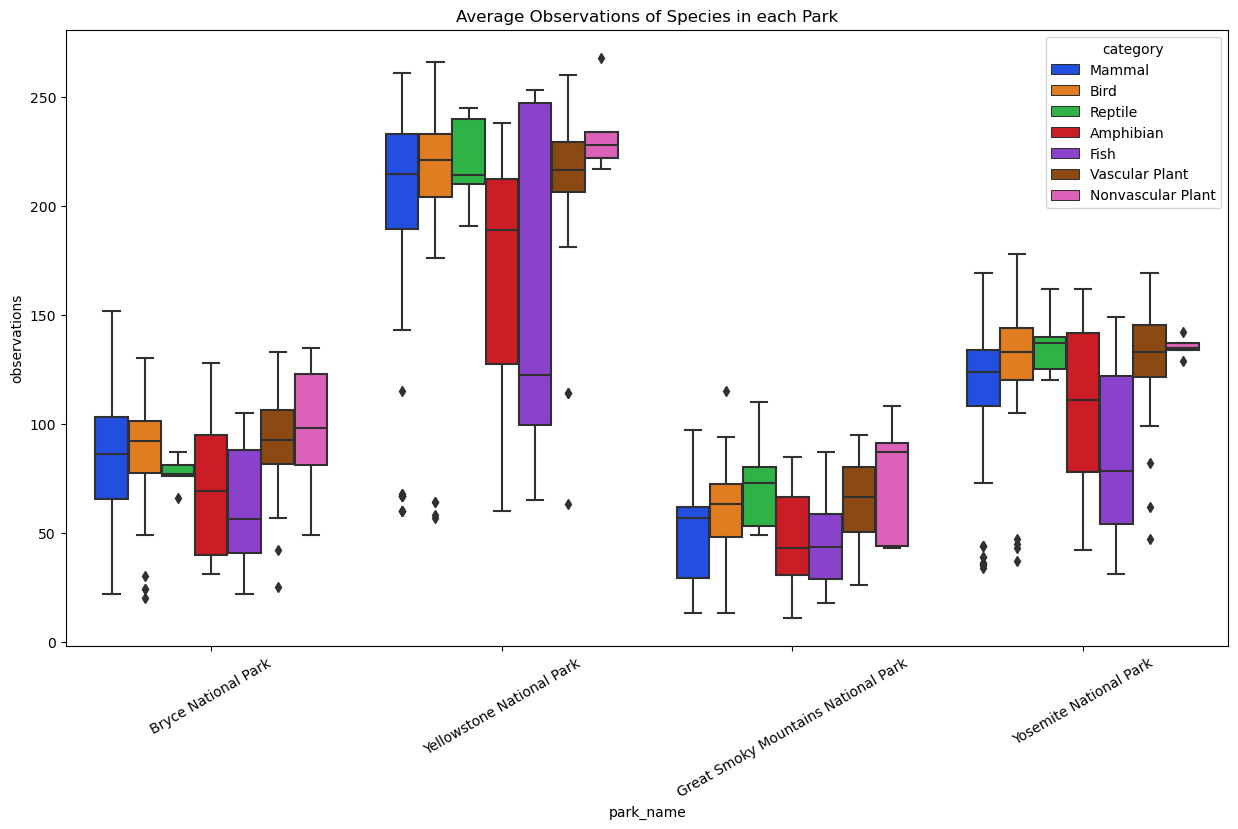

In [450]:
#I then create a boxplot representing the average number of observations for each specie category in each park.

plt.figure(figsize=(15, 8))
sns.boxplot(x="park_name", y="observations", hue="category", palette="bright", data=df3)
plt.xticks(rotation=30)
plt.title("Average Observations of Species in each Park")
plt.savefig(r"C:\Users\HP EliteBook\Desktop\BIDataAnalysis\Projects\plots\biodiv5.png", dpi=300)
plt.show()

In [ ]:
#You can from the above chart that Yellowstone NationalPark have the highest number of observations with NonVascular Plants 
#being the most observed (about 225 average observations).
#The Smoky Mountains National Park register the least average number of observations, with Amphibians and fishes being the 
#least observed (around 40 average observations)
#In average, NonVascular Plants are seamingly the most observed species in Bryce National Park (around 100), while reptiles
#are the most observed in Yosemite National Park (around 140 average observations approximately)

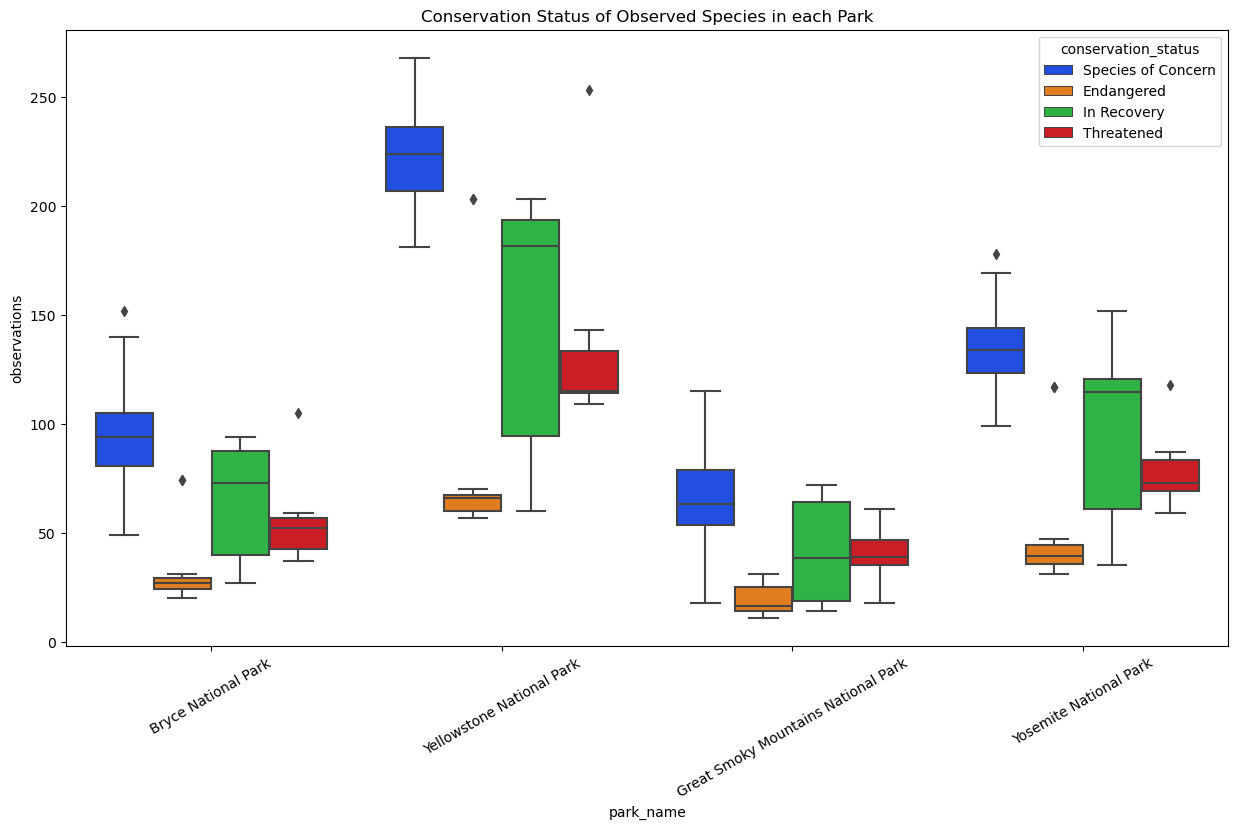

In [451]:
#I also want to display boxplot showing the conservation status of the observed species in each park.

plt.figure(figsize=(15, 8))
sns.boxplot(x="park_name", y="observations", hue="conservation_status", data=df3, palette="bright")
plt.xticks(rotation=30)
plt.title("Conservation Status of Observed Species in each Park")
plt.savefig(r"C:\Users\HP EliteBook\Desktop\BIDataAnalysis\Projects\plots\biodiv6.png", dpi=300)
plt.show()

In [ ]:
#You can see that logically, the most observed species in every park are "Species of Concern" as we saw earlier, most of the 
#species have this conservation status.
#You also see notable observations of species In Recovery and as we discovered earlier, those species are Birds and Mammals.
#Threatened Species are obversed the most in the Yellowstone National Park, those are Fishes, Mammals, Amphibians and 
#Vascular Plants.

In [ ]:
#In conclusion i can say that due to the fact that mammals, birds, and vascular plants have the highest number of species in
#the dataset, it's not surprising that the are also the most overall observed species across parks.
#I also observe that Yellowstone National Park seems to have the most biodiversed environment as it has the highest average
#number of observations for all the species.
#Based on my analysis i can also say that endangered and threatened species, mostly mammals, birds and fishes.
#Overall, Yellowstone and Yesomite National Parks seem the be the best living environment for species as most of the species in
#particular those in recovery were spoted there.